# BioInformatics - Short Practical 3
### Nick Glaser

In [14]:
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt

## Part 1:
### 1.1

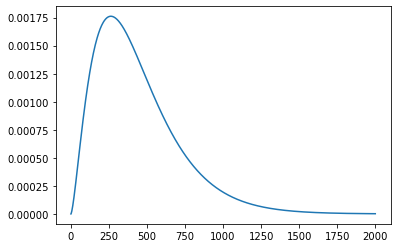

In [242]:
counts = np.linspace (0, 2000, 1000) 
probs = sts.gamma.pdf(counts, a=2.5, scale=175)

plt.plot(counts, probs)
plt.show()

### 1.2
- Get 1000 equally spaced abundance/probability values (the ones plotted above) from the gamma distribution as input to multinomial (representing gamma)
- Sample 20,000 abundances

In [56]:
mn_params = probs / np.sum(probs)

In [119]:
rng = np.random.default_rng()
abundances = rng.multinomial(1, mn_params, size=20_000)
i = np.where(abundances==1)[1]
alphas = counts[test].astype(int)

### 1.3 
- It is hard to visually see how accurately these estimates are compared to the true distribution
- It is obvious that the coverage should exceed the number of genes we're interested in, with the lowest coverage plot here having a significant amount of genes not present at all
- A good way of quantifying the observed difference would be using entropy. E.g. a simply approach could be normalizing the distributions to sum to 1 and then using KL divergence to quantify similarity between estimates vs. true distribution

In [141]:
norm_alphas = alphas / np.sum(alphas)
genes = np.linspace(0, norm_alpha.shape[0], norm_alpha.shape[0])

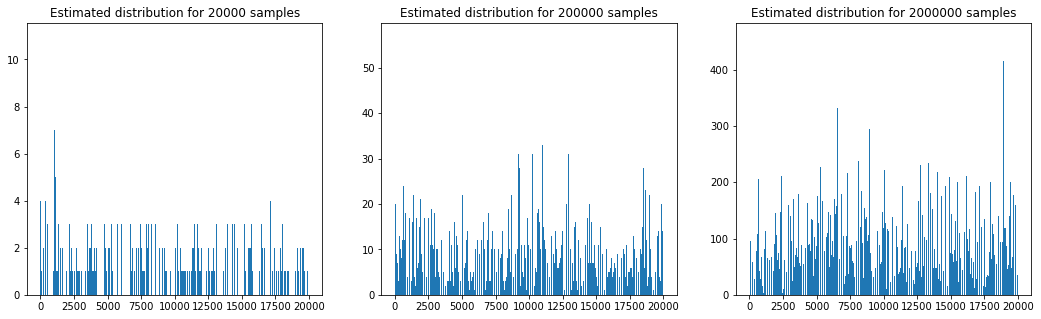

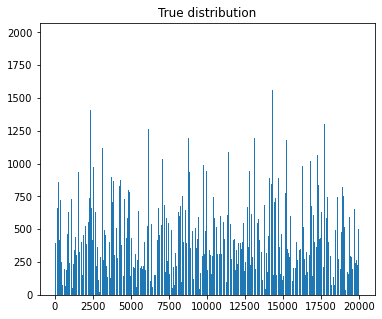

In [246]:
covs = [20_000,200_000,2_000_000]
seqs = []
plt.figure(figsize=(18,5))
for idx, cov in enumerate(covs): 
    seqs.append(rng.multinomial(cov, norm_alphas, size=1).flatten())
    plt.subplot(1,3,idx+1)
    plt.bar(genes, seqs[idx])
    plt.title(f'Estimated distribution for {cov} samples')
plt.show()

plt.figure(figsize=(6,5))
plt.bar(genes, alphas)
plt.title(f'True distribution')
plt.show()

## Part 2:
### 2.1
- I think an argument can be made that rarefaction curves can be used to justify whether a sequencing effort has been sufficient or not, but might not be appropriate to give a prognosis about how much coverage is needed.
- They are a good tool to estimate, given some sequencing outcome, whether the majority (read: 95+%) of genes have been sequenced.
- The plot below shows that the curve really starts to flatten out only once ~99% of genes have been sequenced, it is a simple, visual tool to tell whether a significant portion of genes have indeed been covered or not
    - However, it is perhaps not a good tool (if there is any) to tell whether ALL possible genes have been sequenced

In [240]:
efforts = np.arange(0, 1_500_000, 1000)
covs = rng.multinomial(efforts, norm_alphas, size=1)
gene_counts = norm_alphas.shape[0] - np.count_nonzero(covs==0, axis=1)

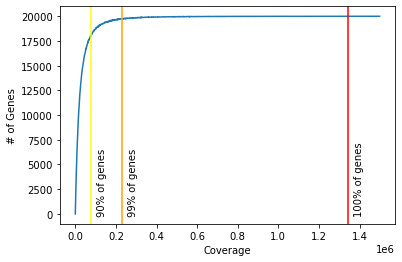

In [244]:
plt.plot(efforts, gene_counts)
plt.xlabel('Coverage')
plt.ylabel('# of Genes')
plt.axvline(x=np.where(np.isclose(gene_counts,int(0.9*norm_alphas.shape[0]), atol=50))[0][0]*1000, color='yellow')
plt.text(np.where(np.isclose(gene_counts,int(0.9*norm_alphas.shape[0]), atol=50))[0][0]*1000+30000,0,'90% of genes',rotation=90)
plt.axvline(x=np.where(np.isclose(gene_counts,int(0.99*norm_alphas.shape[0]), atol=50))[0][0]*1000, color='orange')
plt.text(np.where(np.isclose(gene_counts,int(0.99*norm_alphas.shape[0]), atol=50))[0][0]*1000+30000,0,'99% of genes',rotation=90)
plt.axvline(x=np.where(gene_counts==norm_alphas.shape[0])[0][0]*1000, color='red')
plt.text(np.where(gene_counts==norm_alphas.shape[0])[0][0]*1000+30000,0,'100% of genes',rotation=90)
plt.show()